# Assignment 2:  Ephemeris of Earth

Numerically integrate the Earth’s orbit around the sun. Use the initial conditions from
https://ssd.jpl.nasa.gov/horizons.cgi#top- with ephemeris type “vectors”, target body “earth”,
and coordinate origin sun. 

Explicitly define your code verification variables; calculate them as
well, and try to integrate for a million years (I think this is feasible both with computing time and
with precision- but if it is not go as long as you can with the computing power you have
available). Plot the eccentricity of the orbit and the time of perihelion and aphelion over that
period.

In developing your model and doing your calculations, it is useful to do everything in terms of vectors (and use built in functions for vector operations instead of dealing with individual components).

# Two body Problem

In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy

Calculate and plot the solar-energy fluxes: a) for the entire earth and b) for the northern
hemisphere over the period you are able to integrate. (Ignore reflections, clouds, etc.). 

Don't do this for every year- but make a reasonable sample (say every N years), where N is picked so that there are a few plots covering the interesting regions.


In [13]:
#constants for the 2body problem

mass_earth = 5.9736e24 
mass_sun = 1.9885e30
G = 6.67408e-11

abs_position_earth_sun = np.array([ -1.498994926947174E+08,
    -6.157962886642456E+06,
    8.865554281636141E+02])*1000

abs_velocity_earth_sun = np.array([1.701659572291657E+00, 
                         -2.966166838386400E+01,
                         2.224382206183151E-03
                         ])*1000

sun_intensity = 6.33e7

earth_radius = 6.371e6

![](Sketch.png)

In [14]:
def main(y, t, m1 = mass_earth, m2 = mass_sun): 
    '''
    Main function to be integrated with odeint.
    Input: y (array of elements 12), t (scalar)
    Output: dydt (array of elements 12)   
    '''
    
    planet1_x = y[0:3]
    planet2_x = y[3:6]
    planet1_dx = y[6:9]
    planet2_dx = y[9:12]
    
    
    #calculate the acceleration due to the gravitational field
    g21 = NewtonLaw(planet1_x, planet2_x, mass_sun)
    g12 = NewtonLaw(planet2_x, planet1_x, mass_earth) 
    
    
    dxdt = np.zeros(12)
    
    dxdt[0:3] = planet1_dx
    dxdt[3:6] = planet2_dx
    dxdt[6:9] = g21 
    dxdt[9:12] = g12
        
    return dxdt

In [15]:
def NewtonLaw(r1, r2, m_source): 
    '''
    Vectorized Newton's Law of universal gravitation. Returns the gravitational field cause by a source.
    '''
    
    
    distance = np.linalg.norm(r2-r1)
    direction = (r1-r2)/distance    
    F = -(G*m_source/distance**2)*direction
    return F

![](./Sketch2.png)

In [16]:
def center_of_mass(abs_position, abs_velocity, m1 = mass_earth, m2 = mass_sun):
    '''Returns the position vectors in the center of mass frame for 2 objects.
    
    Input: 
    - absolute distance between planets (tuple)
    - absolute velocity between planets (tuple)
    
    Output:
    - position and velocity in the center of mass frame as the initial conditions.
    '''
    
    planet1_x0 = []
    planet2_x0 = []
    
    planet1_dx0 = []
    planet2_dx0 = []
    
    
    for x_i in abs_position:
        A = np.array([
                     [m1/m2, 1],
                      [1, -1]
                      ])
        b = np.array([[0],[x_i]])
        x = scipy.linalg.solve(A, b)
        val_1, val_2 = x        
        
        planet1_x0.append(val_1)
        planet2_x0.append(val_2)
        
    
    for dx_i in abs_velocity:
        A = np.array([[m1/m2, 1],
                      [1, -1]
                      ])
        b = np.array([[0],[dx_i]])
        
        x = scipy.linalg.solve(A, b)
        val_1, val_2 = x      
    
        planet1_dx0.append(val_1)
        planet2_dx0.append(val_2)
    
    initial_cond = np.zeros(12)
    initial_cond[0:3] = planet1_x0
    initial_cond[3:6] = planet2_x0
    initial_cond[6:9] = np.array(planet1_dx0).reshape(3)
    initial_cond[9:12] = np.array(planet2_dx0).reshape(3)
    
    return initial_cond

In [17]:


initial_cond = center_of_mass(abs_position_earth_sun, abs_velocity_earth_sun)
initial_cond

array([-1.49899042e+11, -6.15794439e+09,  8.86552765e+05,  4.50307729e+05,
        1.84989171e+04, -2.66326960e+00,  1.70165446e+03, -2.96615793e+04,
        2.22437552e+00, -5.11189494e-03,  8.91055620e-02, -6.68218739e-06])

In [18]:
year = 3.154e+7
day = 86400
au = 149597870700

t = np.linspace(0, 1*year, num=1000)

sol = odeint(main, initial_cond, t,rtol=1e-11,atol=1e-11)
sol

array([[-1.49899042e+11, -6.15794439e+09,  8.86552765e+05, ...,
        -5.11189494e-03,  8.91055620e-02, -6.68218739e-06],
       [-1.49842382e+11, -7.09428031e+09,  9.56761970e+05, ...,
        -5.67063588e-03,  8.90808587e-02, -6.67875131e-06],
       [-1.49779850e+11, -8.03033823e+09,  1.02693368e+06, ...,
        -6.22932504e-03,  8.90526566e-02, -6.67505241e-06],
       ...,
       [-1.50055573e+11, -2.75142081e+09,  6.30981431e+05, ...,
        -3.08007531e-03,  8.91659161e-02, -6.69246712e-06],
       [-1.50020266e+11, -3.68845783e+09,  7.01303691e+05, ...,
        -3.63882096e-03,  8.91539249e-02, -6.68998638e-06],
       [-1.49979087e+11, -4.62535046e+09,  7.71598501e+05, ...,
        -4.19759397e-03,  8.91384396e-02, -6.68724297e-06]])

<IPython.core.display.Javascript object>


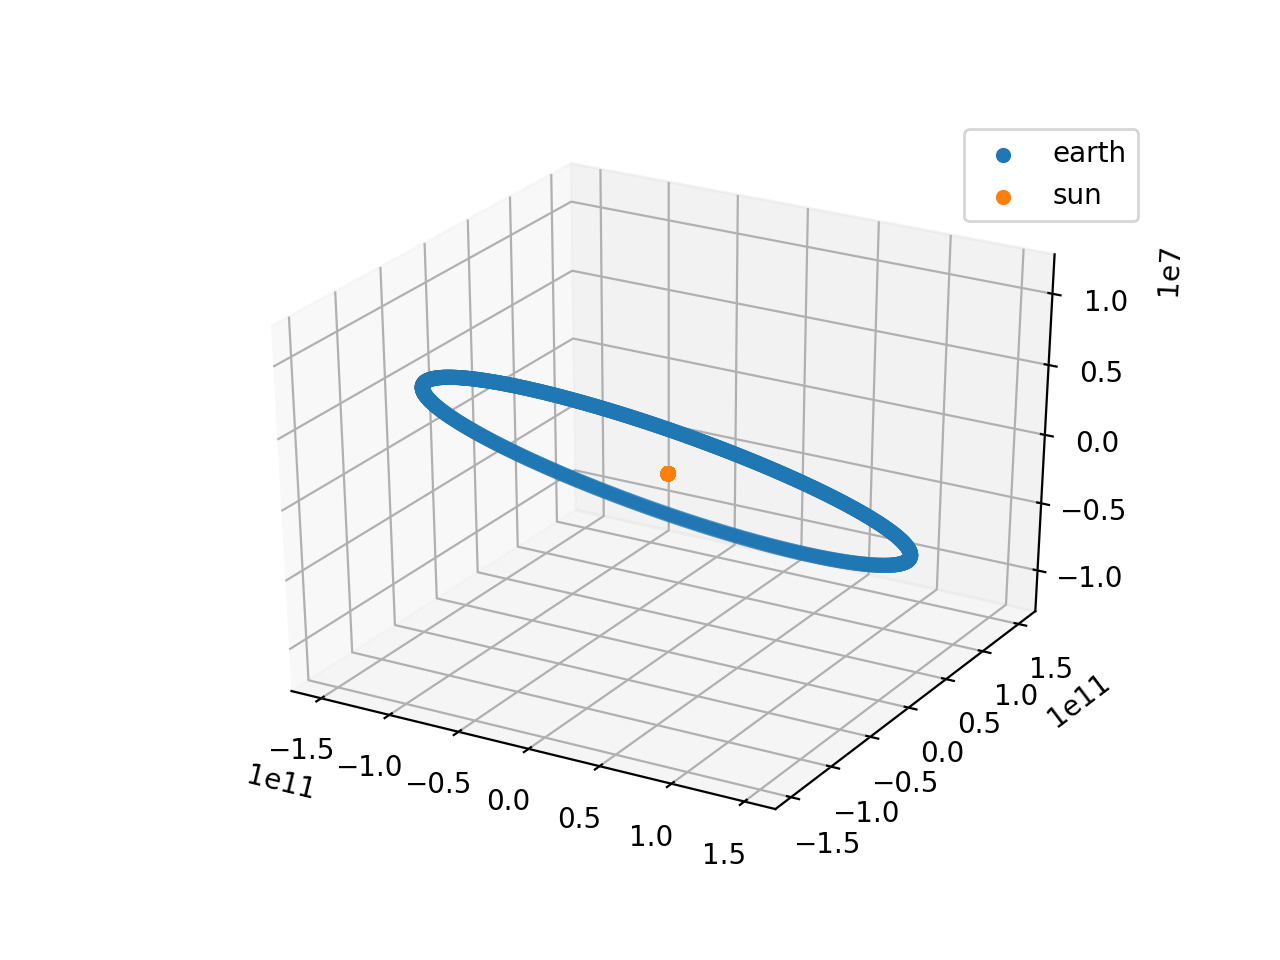

In [19]:
%matplotlib notebook 
#if %matplotlib notebook is causing problems, see the attached HTML file 
#or comment this magic function out and restart jupyter notebook. 
#This command will NOT work on jupyter lab.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(sol[:, 0], sol[:, 1], sol[:, 2], label='earth')
ax.scatter(sol[:, 3], sol[:, 4], sol[:, 5], label='sun')
ax.legend()

In [9]:
# Calculating the solar flux. We calculate by calculating the distance between the Earth and the sun

r = np.zeros(1000)

for i in range(sol[:, 0].size):
    r[i] = np.sqrt(sol[i, 0]**2 + sol[i, 1]**2 + sol[i, 2]**2)
    

# Approximate the projection of sunlight from sun as a circle. 
# This is a good approximation since the distance from earth to sun is much bigger than the Earth's radius.
solar_flux = (sun_intensity/r**2)*np.pi*earth_radius**2

%matplotlib notebook
plt.plot(t, solar_flux,label='solar flux of entire earth')
plt.legend()

<IPython.core.display.Javascript object>

In [20]:
%matplotlib notebook
solar_flux_northern_hemisphere = (sun_intensity/r**2)*np.pi*earth_radius**2/2

plt.plot(solar_flux_northern_hemisphere, label='solar flux of northern hemisphere')
plt.legend()

<IPython.core.display.Javascript object>

In [22]:
perihelion_time = t[np.argmin(r)] # find the t that minimizes r
apehelion_time = t[np.argmax(r)] # find the t that maximizes r

rp = np.min(r) #max and min of r
ra = np.max(r)

month = 2.628e+6 #1 month to seconds

print(f"The perihelion is {rp} meters, at time = {perihelion_time/month} months")
print(f"The perihelion is {ra} meters, at time = {apehelion_time/month} months")

The perihelion is 147250399825.58453 meters, at time = 3.2316410779120064 months
The perihelion is 152157454556.3417 meters, at time = 9.238408880722426 months


Eccentricity formula from Wikipedia.

$$
{\displaystyle {\begin{aligned}e&={{r_{\text{a}}-r_{\text{p}}} \over {r_{\text{a}}+r_{\text{p}}}}\\&=1-{\frac {2}{{\frac {r_{\text{a}}}{r_{\text{p}}}}+1}}\end{aligned}}}
$$

In [23]:
eccentricity = (ra-rp)/(ra+rp)
print(f"The eccentricity is {eccentricity}, which agrees with the result on Wikipedia. e=(0.168)")

The eccentricity is 0.016389198409263193, which agrees with the result on Wikipedia. e=(0.168)


Now add Jupiter and calculate the three body system. Compare the Earth’s orbit and the solar
fluxes to those you would get without Jupiter present.


# Three body problem

In [24]:
mass_jupiter = 1.898e27

abs_position_earth_jupiter = np.array([-1.793381851203380E+08,
                         -7.928485458110735E+08,
                         3.927159930685937E+06
                         ])*1000

abs_velocity_earth_jupiter = np.array([1.461470340320604E+01, 
                         -2.953574562509664E+01,
                         -2.872718415815214E-01
                         ])*1000

def main2(y, t, m1 = mass_earth, m2 = mass_sun, m3 = mass_jupiter):
    '''
    Main function to be integrated with odeint for the 3 body problem.
    Input: y (array of elements 12), t (scalar)
    Output: dydt (array of elements 12)   
    '''
    planet1_x = y[0:3]
    planet2_x = y[3:6]
    planet3_x = y[6:9]
    planet1_dx = y[9:12]
    planet2_dx = y[12:15]
    planet3_dx = y[15:18]
    
    F21 = NewtonLaw(planet1_x, planet2_x, mass_sun)
    F31 = NewtonLaw(planet1_x, planet3_x, mass_jupiter)
    
    F12 = NewtonLaw(planet2_x, planet1_x, mass_earth)
    F32 = NewtonLaw(planet2_x, planet3_x, mass_jupiter)
    
    F13 = NewtonLaw(planet3_x, planet1_x, mass_earth)
    F23 = NewtonLaw(planet3_x, planet2_x, mass_sun)
    
    #print((F12 - -F21), (F13 - -F31), (F23 - -F32))
    
    dxdt = np.zeros(18)
    
    dxdt[0:3] = planet1_dx
    dxdt[3:6] = planet2_dx
    dxdt[6:9] = planet3_dx
    dxdt[9:12] = F21 + F31
    dxdt[12:15] = F12 + F32
    dxdt[15:18] = F13 + F23
        
    return dxdt

In [25]:
def center_of_mass2(abs_position12, abs_position13, abs_velocity12, abs_velocity13, m1 = mass_earth, m2 = mass_sun, m3 = mass_jupiter):
    '''Returns the position vectors of 3 planets in the center of mass frame.
    
    Input: 
    - absolute distance between planets (tuple)
    - absolute velocity between planets (tuple)
    
    Output:
    - position and velocity in the center of mass frame as the initial condition.
    '''
    
    planet1_x0 = []
    planet2_x0 = []
    planet3_x0 = []
    
    planet1_dx0 = []
    planet2_dx0 = []
    planet3_dx0 = []
    
    
    for x_i1, x_i2 in zip(abs_position12, abs_position13):       
        A = np.array([
                    [m1/m2, 1, m3/m2],
                    [1, -1, 0],
                    [1, 0, -1]
                      ])
        b = np.array([[0],[x_i1],[x_i2]])
        x = np.linalg.inv(A) @ b
        val_1, val_2, val_3 = x        
        
        planet1_x0.append(val_1)
        planet2_x0.append(val_2)
        planet3_x0.append(val_3)
        
    for dx_i1, dx_i2 in zip(abs_velocity12, abs_velocity13):       
        A = np.array([
                    [m1/m2, 1, m3/m2],
                    [1, -1, 0],
                    [1, 0, -1]
                      ])
        b = np.array([[0], [dx_i1],[dx_i2]])
        x = np.linalg.inv(A) @ b
        val_1, val_2, val_3 = x        
        
        planet1_dx0.append(val_1)
        planet2_dx0.append(val_2)
        planet3_dx0.append(val_3)
    
    initial_cond = np.zeros(18)
    initial_cond[0:3] = planet1_x0
    initial_cond[3:6] = planet2_x0
    initial_cond[6:9] = planet3_x0
    initial_cond[9:12] = planet1_dx0
    initial_cond[12:15] = planet2_dx0
    initial_cond[15:18] = planet3_dx0
    return initial_cond

In [26]:
initial_cond = center_of_mass2(abs_position_earth_sun,
                               abs_position_earth_jupiter,
                               abs_velocity_earth_sun,
                               abs_velocity_earth_jupiter)

In [27]:
t2 = np.linspace(0, 18*year, 100)

sol_3body = odeint(main2, initial_cond, t2)

In [28]:
sol_3body[:, 0].shape

(100,)

<IPython.core.display.Javascript object>


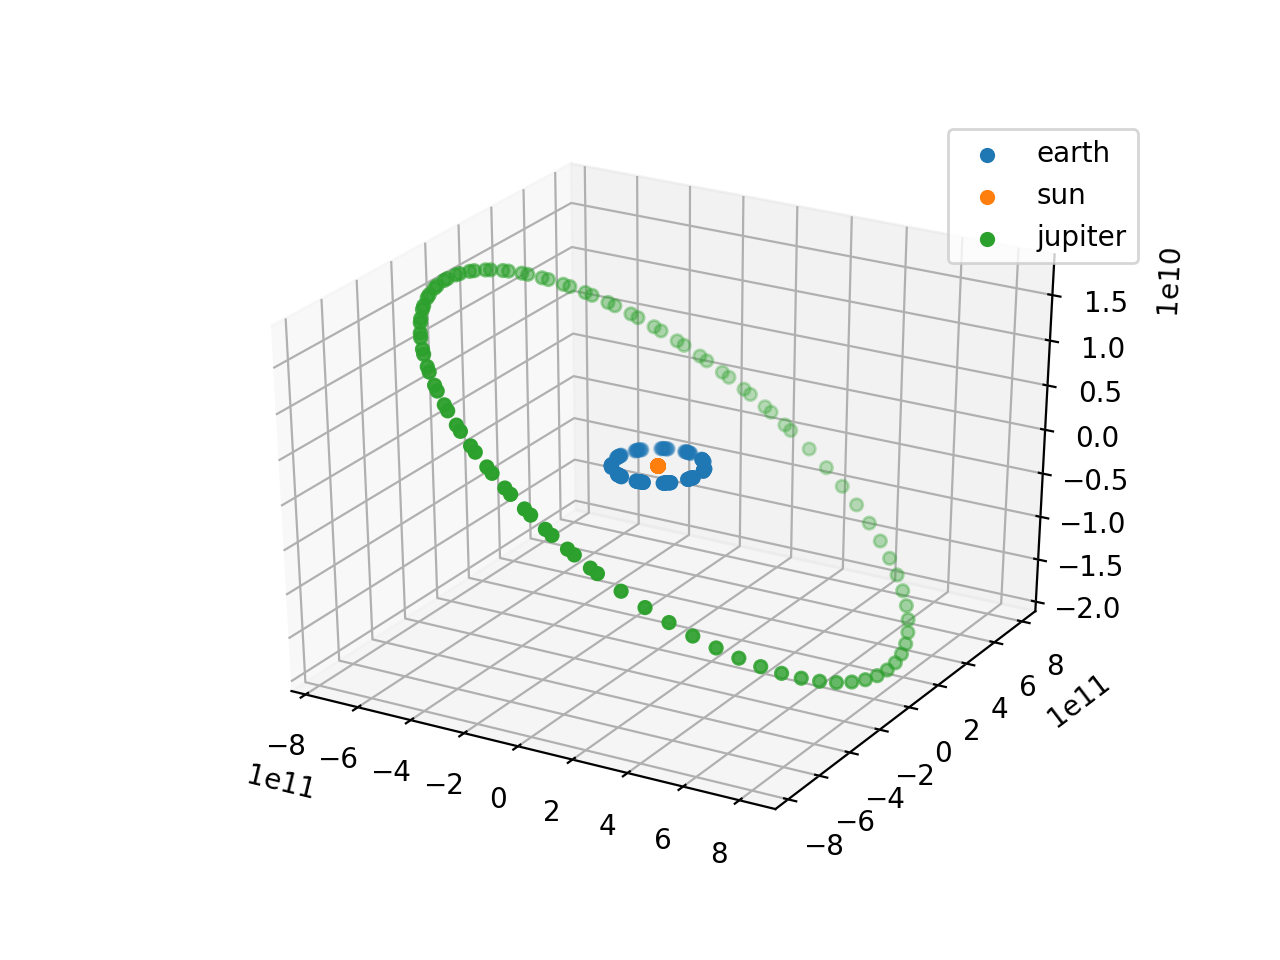

In [29]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')


ax.scatter(sol_3body[:, 0], sol_3body[:, 1], sol_3body[:, 2], label='earth')
ax.scatter(sol_3body[:, 3], sol_3body[:, 4], sol_3body[:, 5], label='sun')
ax.scatter(sol_3body[:, 6], sol_3body[:, 7], sol_3body[:, 8], label='jupiter')

ax.legend()